In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.chdir("/home/jrchen/git-project/kpts_test")

root_dir_pred = "link/datasets/nrealX/MoveRightHandTestDemo/test2_2023-03-15-16-58-21/predicted_data"

file_list_pred = os.listdir(root_dir_pred)
file_list_pred = list(filter(lambda x: "predicted" in x, file_list_pred))
file_list_pred.sort()

In [18]:
delta_ts_list = []

# pred info 
for index, filename in enumerate(file_list_pred):
    with open(os.path.join(root_dir_pred, filename), 'r') as f:
        data = json.load(f)
    
    ts_ori = data["current_time_nanos"]
    ts_pred = data["predicted_time_nanos"]

    delta_ts = (ts_pred - ts_ori) / 1e6  # ms
    delta_ts_list.append(delta_ts)



In [25]:
len_delta = len(delta_ts_list)
start_idx = int(len_delta * 1 / 10)
end_idx = int(len_delta * 9 / 10)
delta_ts_list_clip = np.array(delta_ts_list[start_idx: end_idx])


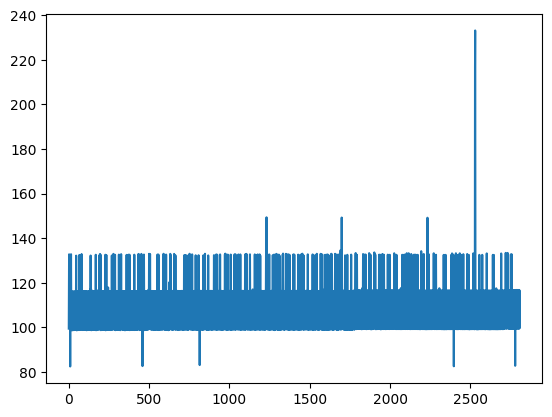

In [26]:
plt.plot(delta_ts_list_clip)

In [27]:
print(
f"mean: {delta_ts_list_clip.mean()}\n\
max: {delta_ts_list_clip.max()}\n\
min: {delta_ts_list_clip.min()}"    
)

mean: 110.03919381944444
max: 233.117559
min: 82.424443
